# STEP 0: PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: IMPORT LIBRARIES/DATASETS

In [1]:
import pandas as pd ##for data manipulations like excel
import numpy as np
##data visualization
import matplotlib.pyplot as plt
import seaborn


In [2]:
from keras.datasets import cifar10 ##no need the data to be present in folder, its already present in Keras
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

Using TensorFlow backend.
C:\Users\nishi44\Anaconda3\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nishi44\Anaconda3\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nishi44\Anaconda3\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nishi44\Anaconda3\Anaconda\lib\site-pa

In [3]:
X_train.shape # here 32-width,32-heigth,3-rgb(Channels)
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
Y_train.shape #

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
Y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[0]


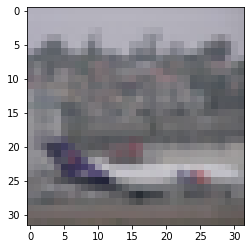

In [7]:
##here i represent the image number, since we have 60,000 images
i = 30000
plt.imshow(X_train[i])
##lets check which class this image belongs to
print(Y_train[i])
##it belongs to class 4 - deer -1001

C:\Users\nishi44\Anaconda3\Anaconda\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


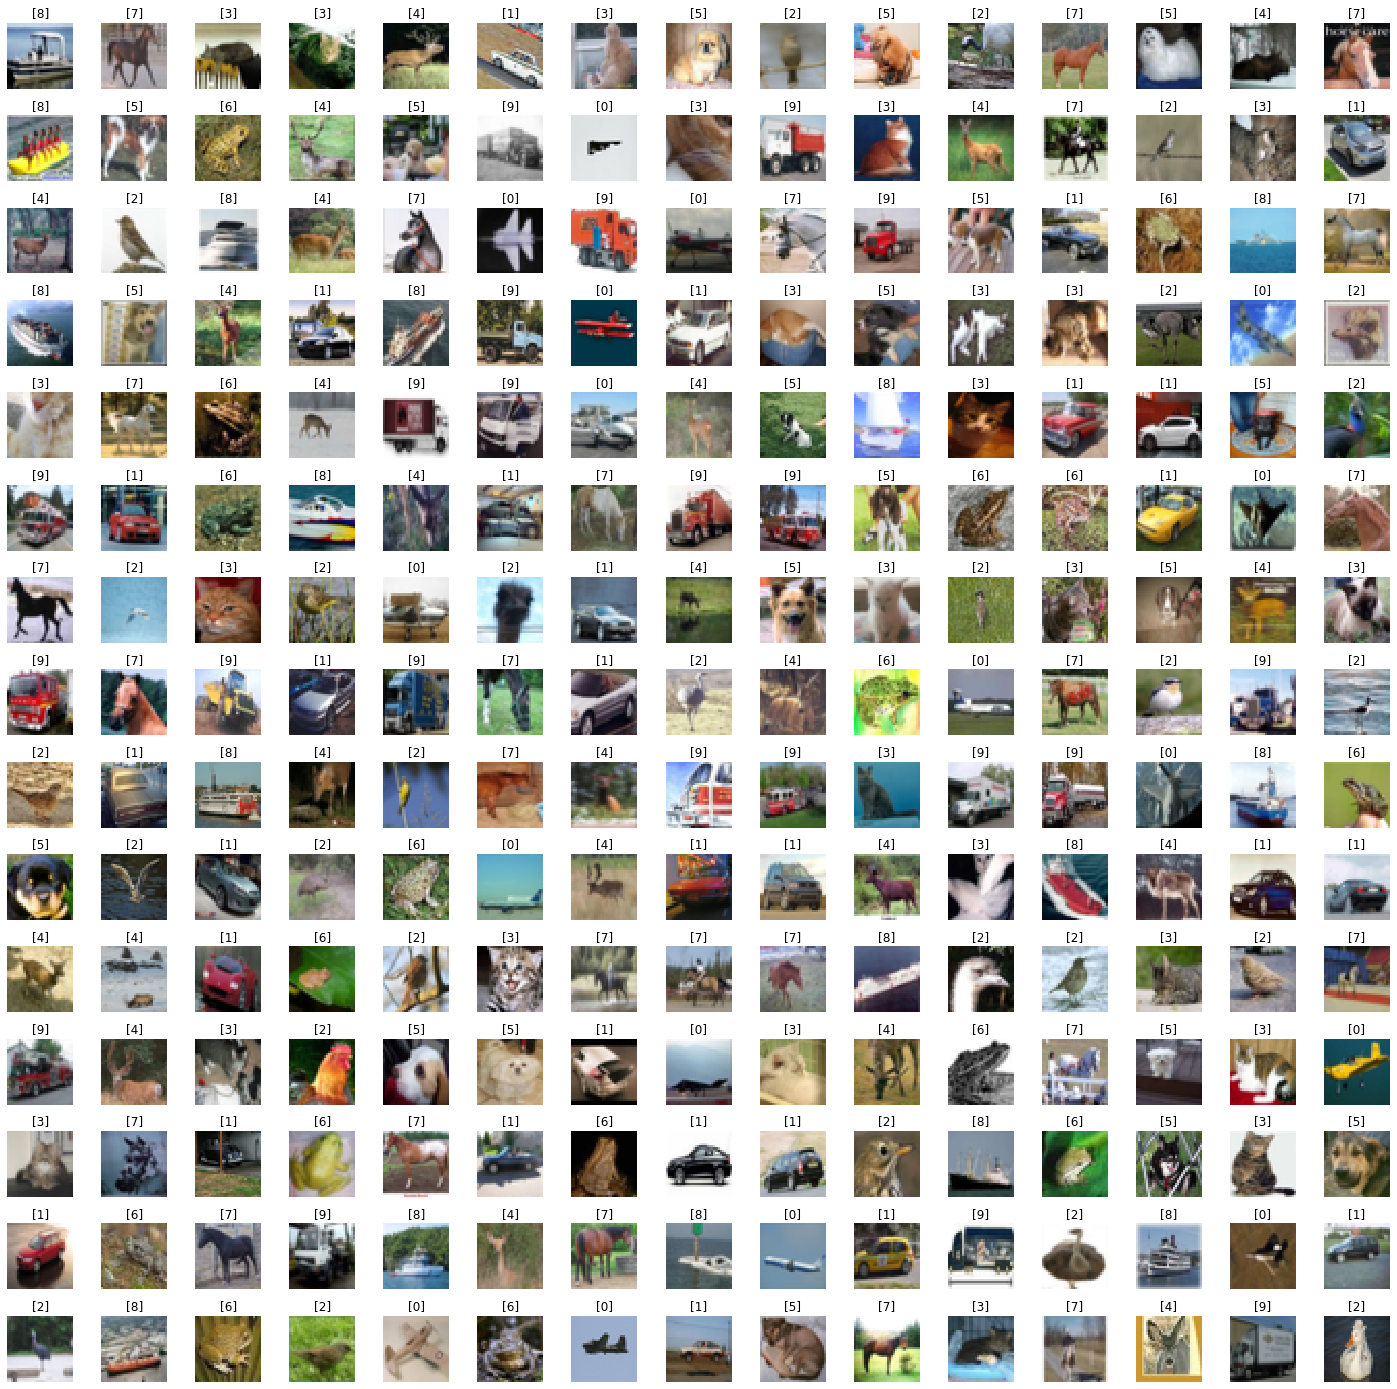

In [8]:
##now lets print all the images instead of single images by creating a grid of 15*15
w_grid = 15
l_grid = 15

fig,axes = plt.subplots(l_grid, w_grid, figsize = (25, 25))
##ravel - used to flatten the matrix, 15*15 -- 255 arrays(15*15 =255)
axes = axes.ravel()

#get the length of the data
n_training = len(X_train)

##now we need to plot the image into these matrix use for loop
for i in np.arange(0, l_grid * w_grid): ## this creates array from 0 to 15*15(255)
    ##pick random images now
    index = np.random.randint(0, n_training)## 50,000 training images
    axes[i].imshow(X_train[index]) 
    axes[i].set_title(Y_train[index]) ##y has all the names. We are setting the title for each
    axes[i].axis('off')    ##get rid of all those values of pixels
    plt.subplots_adjust(hspace = 0.4) ## to increase the spacing between two images

In [9]:
n_training

50000

# STEP #3: DATA PREPARATION

In [10]:
##convert to float type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [11]:
number_cat = 10

In [12]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
##convert the decimal to binary format
import keras 
Y_train = keras.utils.to_categorical(Y_train,10)

In [14]:
Y_train
# 9 - 01000000 - only 1 neuron is been fired up here for 9

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
import keras 
Y_test = keras.utils.to_categorical(Y_test, 10)

In [16]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
## now we have data values ranging from 0 - 255, we need to normalise to vary between 0 - 1
X_train = X_train/255
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [18]:
X_test = X_test/255
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [19]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
#i need only 32,32,3
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [21]:
#build model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout ##convlution,reducing the dimenstion of the image
#two ways of pooling, aveg-average the values of the pixels,dense-create fully connected ai network,flatten-faltten array
#Dropout: regularization, to dropout the neurons and weights to improve the capability of n/w
from keras.optimizers import Adam #to obtain weights of the network
from keras.callbacks import TensorBoard 

In [22]:
#build network
cnn_model = Sequential()
##kernel_size = filter dimensions
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
##create another convolution layer
# output from last layer will be an input to the nxe layer, no need to specify input.
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))

#maxpooling layer
cnn_model.add(AveragePooling2D(2,2))#refer notes
cnn_model.add(Dropout(0.7))##to dropout 30% of the neurons along with their weights

##add the convolution layer with filters 64 and dropout 20%
cnn_model.add(Conv2D(filters = 264, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 264, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.7))

##flattening
cnn_model.add(Flatten())

##fully connected layer, units= number of neurons
cnn_model.add(Dense(units = 1024,activation = 'relu'))
cnn_model.add(Dense(units = 1024, activation = 'relu'))

##relu is used for continuous i.e, regression here it is classification so we use softmax(o/p = 0 or 1)
#We are classifying into 10 classes
##output layer
cnn_model.add(Dense(units = 10, activation = 'softmax'))


In [23]:
#we are using here keras, tensorflow is complicated compared to keras
##now lets train the model
##we are using root mean square optimizers and lr is how fast out model is trained
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001),metrics = ['accuracy'])

In [24]:
##fit the training data to our model
#history gives all the progression of the network that is been trained,all te values of the validations will be captured
history = cnn_model.fit(X_train,Y_train, batch_size = 32, epochs = 1, shuffle = True)#batch size meaning how many number of images will be fed at once
#we dont want machine to learn the order of the images hence change the order using shuffle
#here we are feeding the input to the machine and making it to learn. Accuracy increases when the data is input.


Epoch 1/1
50000/50000 [==============================] - 1564s 31ms/step - loss: 1.7942 - accuracy: 0.3492


# STEP #5: EVALUATE THE MODEL

In [25]:
#we evaluate the test data and not train data,cnn_data is trained model
evaluation = cnn_model.evaluate(X_test,Y_test)
print('Test Accuracy: {}'.format(evaluation[1]))##in evaaluation we get validation and  accuracy, we need only accuracy here
#0.3 is very bad need arount 0.8 , to do this we need to change the epochs to 50.

10000/10000 [==============================] - 56s 6ms/step
Test Accuracy: 0.4767000079154968


In [26]:
#take the train model i.e,cnn_model and feed this with X_test 
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes
#we are feeding 10,000 images into the model
#now images are in decimal format

array([3, 1, 8, ..., 5, 1, 7], dtype=int64)

In [27]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [28]:
Y_test = Y_test.argmax(1)

In [29]:
Y_test
##this is same as the predicted class output

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

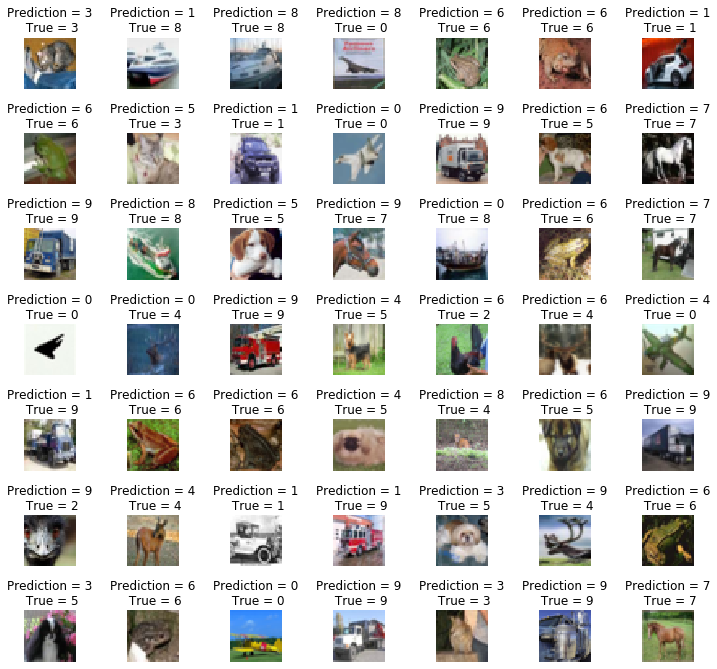

In [30]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize= (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],Y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)    


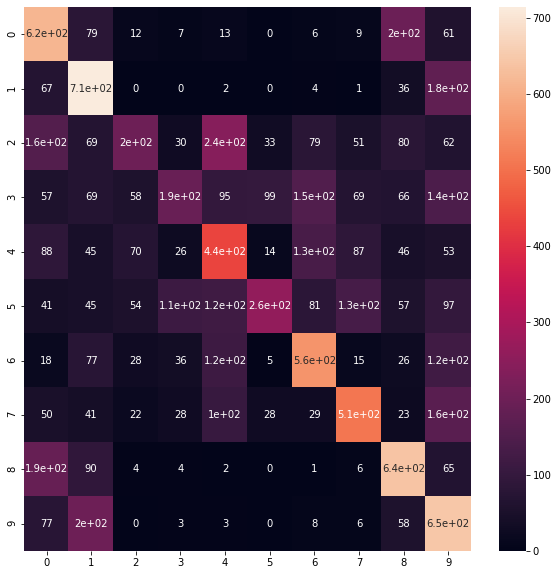

In [31]:
#the predicted output were half right(50%)
#we use confusion matrix to summarize all our results in one location
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test,predicted_classes)
cm
#here we get the matrix and that represent the 10*10 which shows how many values are correctly classified and how
#many are misclassified
#now using seaborn to represent in better format
plt.figure(figsize =(10,10))
sns.heatmap(cm, annot = True)
#rows-> predicted
#columns->true
#if the true value matches the predicted class values then that is been diagonal
#when there is a misclassification then we will have all those messups in the matrix and we dont require them.


# STEP #6: SAVING THE MODEL

In [32]:
#we have trained the model which is cnn_model
import os
#create a directory, first get the current working directory and create a new folder called 'saved_models'
directory = os.path.join(os.getcwd(), 'saved_models')

#if there is a directory called as saved_models then no need to create again
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar10_trained_model.h5')
#now take my model cnn_model and save it in model_path
cnn_model.save(model_path)
    

# STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

# STEP 7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [ ]:
import keras
from keras.datasets import cifar10

#load data
(X_train,Y_train),(X_test,Y_test)  = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train.shape

In [ ]:
n = 20 # pick only 8 images
x_train_sample = X_train[:n]
x_train_sample.shape

In [ ]:
##image augmentation
from keras.preprocessing.image import ImageDataGenerator
#dataget_train = ImageDataGenerator(horizontal_flip=True)#image rotation to 90 degrees#SHIFT+TAB->endless options
dataget_train = ImageDataGenerator(brightness_range=(1,4))
#dataget_train = ImageDataGenerator(zoom_range = 1.0)
dataget_train.fit(x_train_sample)

In [ ]:
#endless variations for out images
import PIL
from PIL import Image

fig = plt.figure(figsize = (20,2))
#here batch meaning number of images fed at once
for x_batch in dataget_train.flow(x_train_sample, batch_size = n):

     for i in range(0,n):

            ax = fig.add_subplot(1, n, i+1)#1-row , n - columns, 0+1- here image will be stored

            ax.imshow(Image.fromarray(np.uint8(x_batch[i])))

     fig.suptitle('Augmented images')

     plt.show()

     break;


# STEP 7.2 MODEL TRAINING USING AUGEMENTED DATASET

In [ ]:
#here we are generating the new images with new features like rotation_range etc and fitting into our cnn_model
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                    rotation_range=90,
                    width_shift_range = 0.1,
                    horizontal_flip = True,
                    vertical_flip = True
                            )

In [ ]:
datagen.fit(X_train)

In [ ]:
#here we are training out model by running two epochs
cnn_model.fit_generator(datagen.flow(X_train,Y_train,batch_size = 32),epochs = 2)

In [ ]:
#evaluate model
score = cnn_model.evaluate(X_test,Y_test)
print('Test Accuracy:',score[1])

In [ ]:
#save the model whcih has image augmentation
import os
#create a directory, first get the current working directory and create a new folder called 'saved_models'
directory = os.path.join(os.getcwd(),'saved_augmented_models')
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar10_trained_model_Augmentation.h5')
#now take my model cnn_model and save it in model_path
cnn_model.save(model_path)
